# Worldwide Stock Market performance analysis post-covid

Import the requried packages:
<ul>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Matplotbil</li>
    <li>yFinance</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

import yfinance as yf

Grab the adjusted close price from: HK HengSeng, US S&P500, UK FTSE, MSCI Developed, MSCI Emerging

<br>

<li>Adjusted close price: the closing price after adjustments for all applicable splits and dividend distributions. It is considered as a more accurate measure of stocks' value.</li>

<br>

Timeframe: 2020-01-01 to 2022-11-01

In [2]:
stock_indexes_tickers = ["^HSI","^GSPC","^FTSE","XWD.TO","XEM.TO"]

df_indices = pd.DataFrame()

startDate = "2020-01-01"
endDate = "2022-11-01"

for ticker in stock_indexes_tickers:
    df_indices[ticker] = yf.download(ticker, start=startDate, end=endDate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Examine first 5 and last 5 rows

In [3]:
pd.concat([df_indices.head(5), df_indices.tail(5)])

,^HSI,^GSPC,^FTSE,XWD.TO,XEM.TO
Date,,,,,
2020-01-02,28543.519531,3257.850098,7604.299805,54.172573,31.749758
2020-01-03,28451.500000,3234.850098,7622.399902,53.823383,31.220911
2020-01-06,28226.189453,3246.280029,7575.299805,53.823383,31.018990
2020-01-07,28322.060547,3237.179932,7573.899902,53.891285,31.192068
2020-01-08,28087.919922,3253.050049,7574.899902,54.240471,31.384373
2022-10-25,15165.589844,3859.110107,7013.500000,62.980000,25.820000
2022-10-26,15317.669922,3830.600098,7056.100098,62.720001,26.200001
2022-10-27,15427.940430,3807.300049,7073.700195,62.360001,25.959999
2022-10-28,14863.059570,3901.060059,7047.700195,63.689999,25.830000


use the describe() function to find out some descriptive statistics

In [4]:
df_indices.describe()

,^HSI,^GSPC,^FTSE,XWD.TO,XEM.TO
count,699.000000,681.000000,686.000000,682.000000,682.000000
mean,24614.741845,3857.281779,6845.001599,61.420312,32.265581
std,3232.786402,566.385880,598.359129,6.835649,3.539848
min,14687.019531,2237.399902,4993.899902,41.107136,23.797894
25%,22904.405273,3383.540039,6382.974976,55.839919,29.136815
50%,24763.769531,3910.520020,7029.500000,61.900570,32.031298
75%,26782.679688,4349.930176,7299.649902,67.252106,35.111878
max,31084.939453,4796.560059,7674.600098,74.289253,39.841946


The row counts are roughly the same, because the trading days differs in each stock market throughout the year. Conventionally, we would usually consider 251 trading days per year. 

<br>

Next, I will try to plot a line chart to get a visual representation of the data.

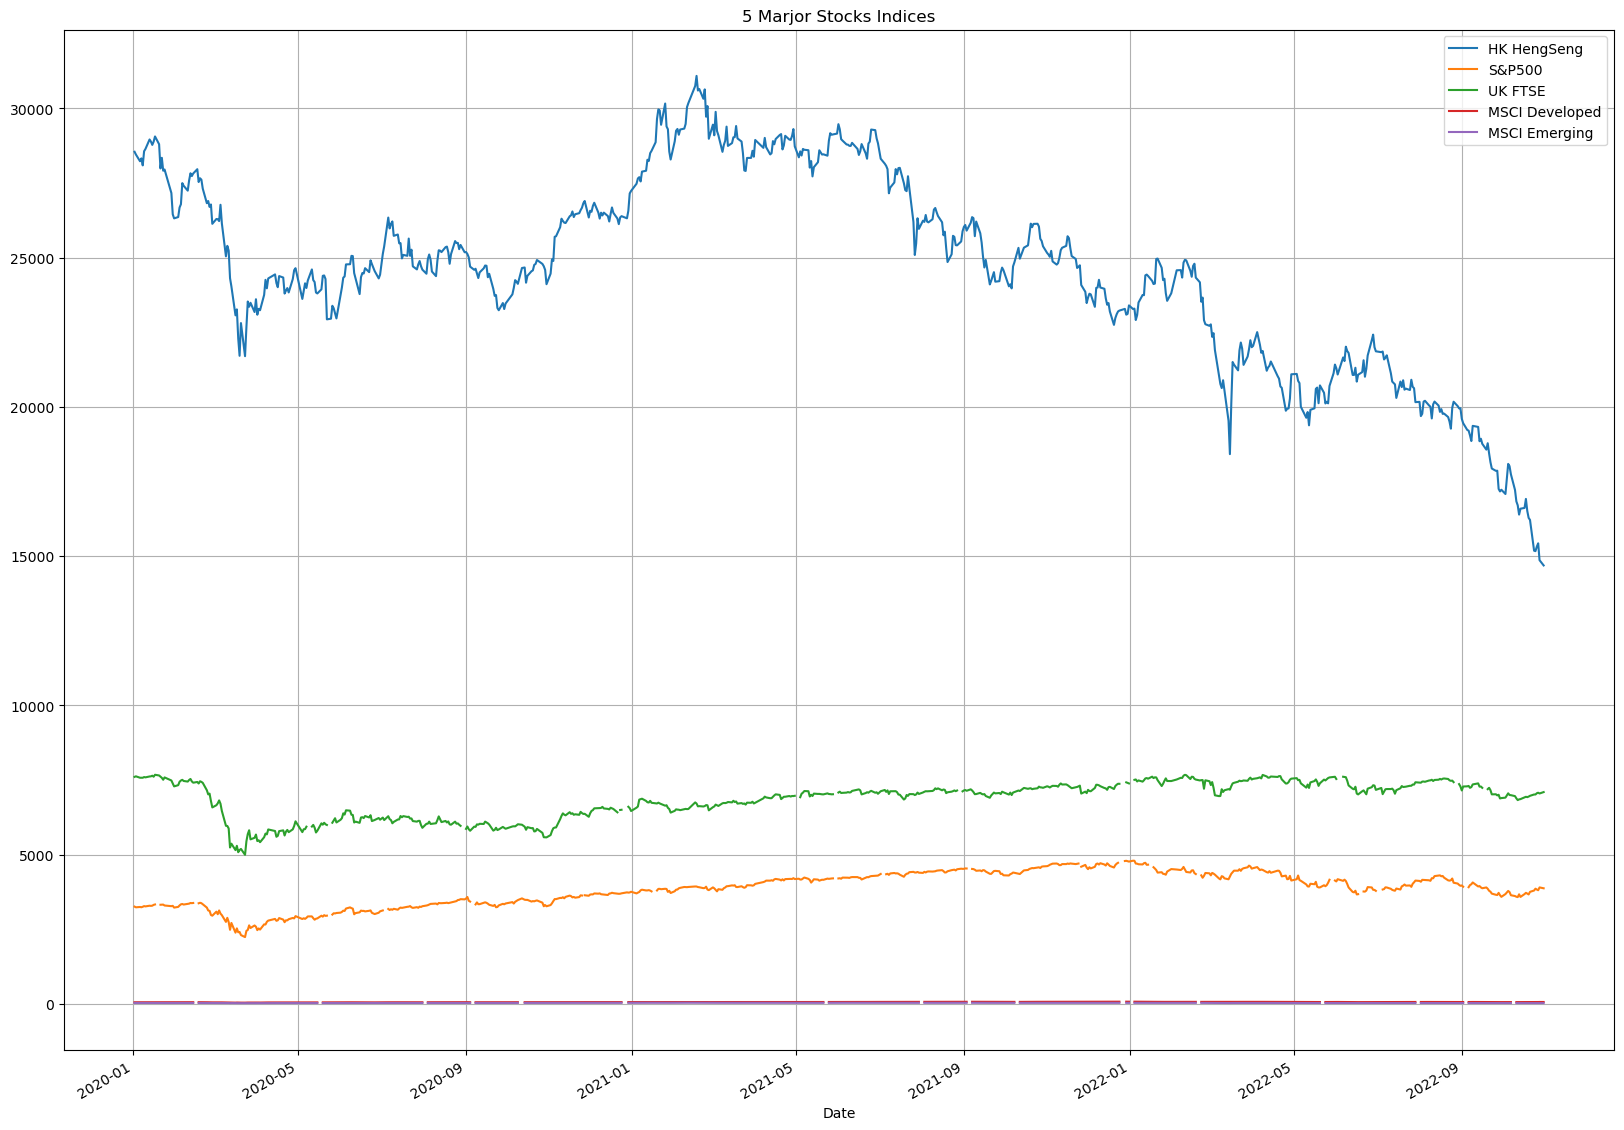

In [5]:
df_indices.plot(kind='line',title="5 Marjor Stocks Indices",grid=True,figsize=(20,15))
plt.legend(["HK HengSeng", "S&P500", "UK FTSE", "MSCI Developed", "MSCI Emerging"])
plt.show()

The line chart above does not really give any insightful information, simply because the these indices are scaled differently. Therefore, a mathematical trick called data normalization should be applied, so that all the indices start at 100. The formula is as follow:

$$
    Normalized\, index = \frac{P_{t}}{P_{0}}\ * 100
$$

Normalize these 5 indices to compare relative changes

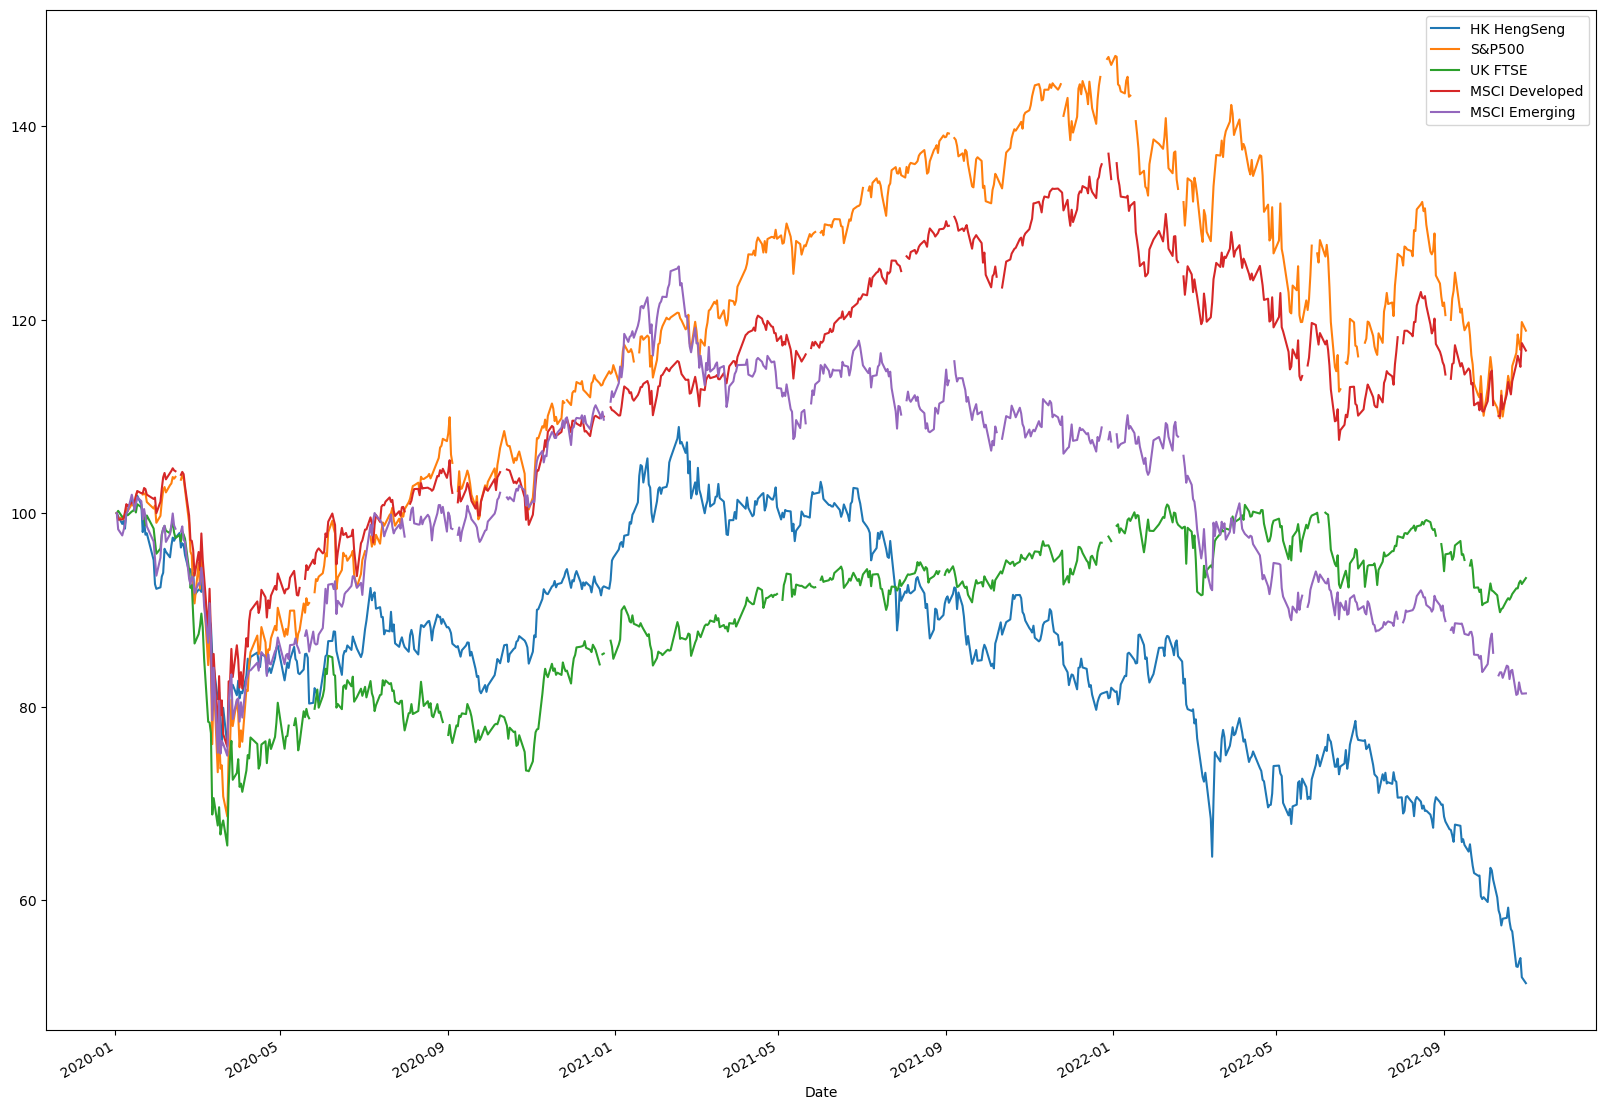

In [6]:
indices_normalized = ((df_indices/df_indices.iloc[0])*100)
indices_normalized.plot(kind="line",figsize=(20,15))
plt.legend(["HK HengSeng", "S&P500", "UK FTSE", "MSCI Developed", "MSCI Emerging"])
plt.show()

Some preliminary observations:
- All 5 markets indices plummetd at the beginning of Covid-19 pandemic
- A general upward trend can be seen from SP500 and MSCI developed. A general downward trend is shown for MSCI Emerging and HSI.

# 1.Analysis for HK HengSeng, S&P500, UK FTSE indices

We are interested in finding out how these markets correlate to each other. Therefore, I will conduct a correlation and  analysis by simply using the corr() method. This will produce a correlation matrix

In [7]:
df_indices.iloc[:,0:3].corr()

,^HSI,^GSPC,^FTSE
^HSI,1.000000,-0.016302,-0.152492
^GSPC,-0.016302,1.000000,0.763011
^FTSE,-0.152492,0.763011,1.000000


The above matrix shows that SP500 and FTSE are positively correlated, and HSI is negatively correlated with the other two. Next, the std() will be used to find out standard deviation.

In [8]:
df_indices.iloc[:,0:3].std()

^HSI     3232.786402
^GSPC     566.385880
^FTSE     598.359129
dtype: float64

## 1.1 ROI (rate on investment) analysis

Calculate the daily rate of return for first 3 markets. The daily ROI is calculated as:

$$
    daily\,ROI = \frac{P_{t}}{P_{t-1}}\ - 1
$$

In [9]:
df_indices_daily_roi = pd.DataFrame()

# calcuate the daily ROI iteratively and store these data into a dataframe
for ticker in stock_indexes_tickers[0:3]:
    df_indices_daily_roi[ticker + ' daily ROI'] = (df_indices[ticker]/df_indices[ticker].shift(1)) - 1
df_indices_daily_roi

,^HSI daily ROI,^GSPC daily ROI,^FTSE daily ROI
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.003224,-0.007060,0.002380
2020-01-06,-0.007919,0.003533,-0.006179
2020-01-07,0.003397,-0.002803,-0.000185
2020-01-08,-0.008267,0.004902,0.000132
...,...,...,...
2022-10-25,-0.000995,0.016267,-0.000071
2022-10-26,0.010028,-0.007388,0.006074
2022-10-27,0.007199,-0.006083,0.002494


Plot these 3 columns

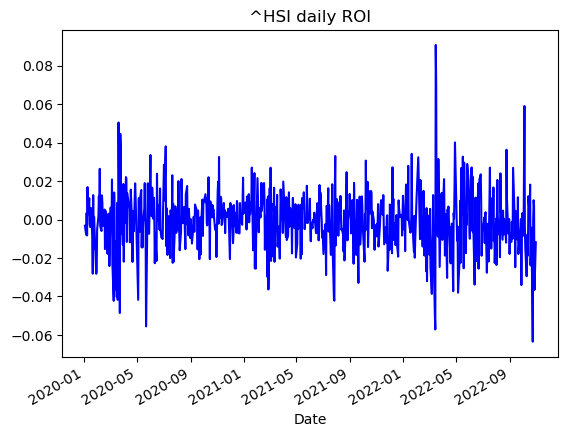

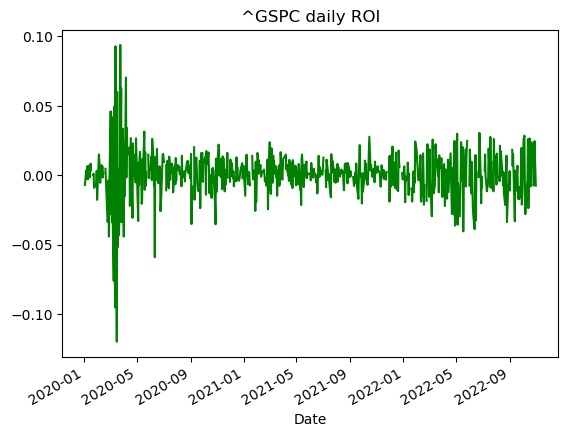

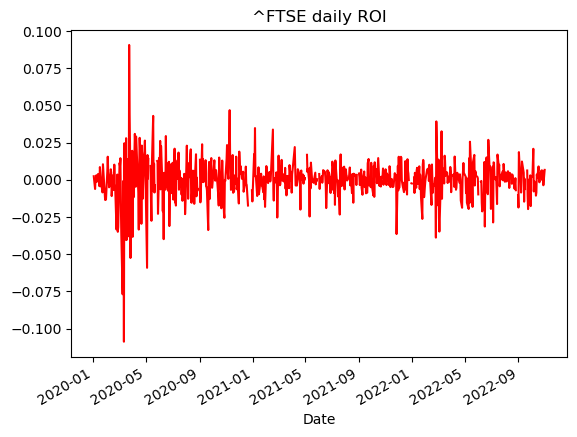

In [10]:
# random color generator
from itertools import cycle
cycol = cycle('bgrcmk')

for index_roi in df_indices_daily_roi:
    df_indices_daily_roi[index_roi].plot(title=index_roi, color=next(cycol))
    plt.show()

Some observations：
- High volitity at the beginning of Covid-19
- The volitility for HSI seems to be higher

Count the positive and negative trading days

In [11]:
df_pos_neg = pd.DataFrame()

for ticker in stock_indexes_tickers[0:3]:
    df_pos_neg[ticker + ' count'] = np.sign(df_indices_daily_roi[ticker + " daily ROI"])
    print(df_pos_neg[ticker + ' count'].value_counts())

-1.0    353
 1.0    345
Name: ^HSI count, dtype: int64
 1.0    351
-1.0    311
Name: ^GSPC count, dtype: int64
 1.0    360
-1.0    311
 0.0      1
Name: ^FTSE count, dtype: int64


Generally speaking, for FTSE and SP500, there exists positive >> negative. For HSI, it is roughly the same.

Calculate the annual rate of returns:

In [12]:
df_indices_daily_roi.mean()*250

^HSI daily ROI    -0.207574
^GSPC daily ROI    0.104690
^FTSE daily ROI   -0.016438
dtype: float64

SP500 has +10% annual ROI!!! Whereas HSI investors experienced a -20% annual ROI

In [13]:
df_indices_daily_roi.describe()

,^HSI daily ROI,^GSPC daily ROI,^FTSE daily ROI
count,698.000000,662.000000,672.000000
mean,-0.000830,0.000419,-0.000066
std,0.015583,0.016461,0.013742
min,-0.063563,-0.119841,-0.108738
25%,-0.008920,-0.006692,-0.005274
50%,-0.000294,0.001001,0.000702
75%,0.007792,0.008309,0.006091
max,0.090818,0.093828,0.090530


Correlation & volatilty analysis for ROI (rate of return)

In [14]:
df_indices_daily_roi.corr()

,^HSI daily ROI,^GSPC daily ROI,^FTSE daily ROI
^HSI daily ROI,1.000000,0.228519,0.429581
^GSPC daily ROI,0.228519,1.000000,0.600076
^FTSE daily ROI,0.429581,0.600076,1.000000


In [15]:
df_indices_daily_roi.std()

^HSI daily ROI     0.015583
^GSPC daily ROI    0.016461
^FTSE daily ROI    0.013742
dtype: float64

## 1.2 Anlysis for the developed world vs the emerging world

Covid-19 definitely has different scales of impact for the developed world and the emering world. There are a number of reasons, such as financial market regulations, social welfare & stability, monetary policies etc.

I am interesed in finding out how Covid-19 impact the developed market and the emeringing market respectively. First, I will grab the dataframe for MSCI developed economies and MSCI emerging economies, then examine the first and last 5 rows

In [16]:
df_indices.iloc[:,3:5]

,XWD.TO,XEM.TO
Date,,
2020-01-02,54.172573,31.749756
2020-01-03,53.823383,31.220915
2020-01-06,53.823383,31.018991
2020-01-07,53.891285,31.192064
2020-01-08,54.240467,31.384367
...,...,...
2022-10-25,62.980000,25.820000
2022-10-26,62.720001,26.200001
2022-10-27,62.360001,25.959999


Plot the dataframe

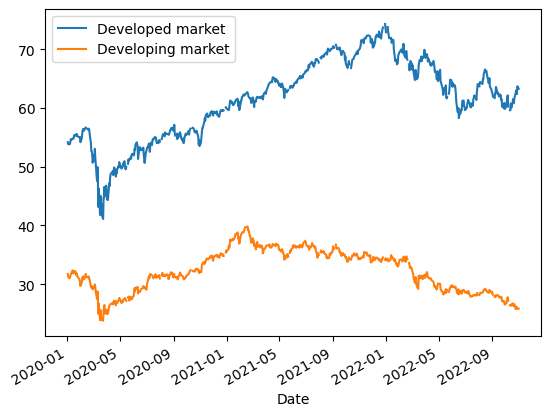

In [17]:
df_indices.iloc[:,3:5].plot()
plt.legend(["Developed market","Developing market"])
plt.show()

Plot the normalized graph

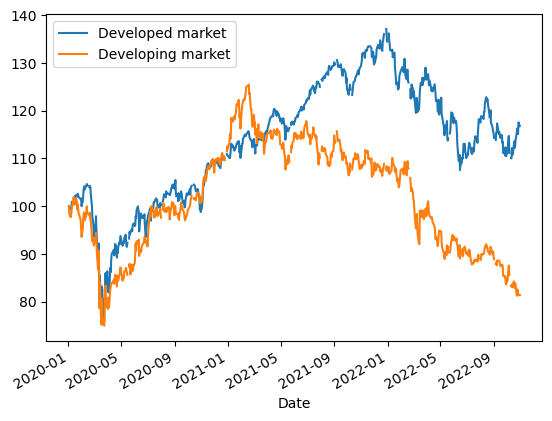

In [18]:
indices_normalized_MSCI = ((df_indices.iloc[:,3:5]/df_indices.iloc[0,3:5])*100)
indices_normalized_MSCI.plot()
plt.legend(["Developed market","Developing market"])
plt.show()

Observations:
- A general upward trend for the developed market, and a general downward trend to the emerging market.
- Both markets have downward trend since 2022-01, because of the FED rate hikes since 2022-01

### Calculate the ROI (rate on investment)

Simple rate of return:

$$
    daily\,ROI = \frac{P_{t}}{P_{t-1}}\ - 1
$$

In [19]:
df_indices_daily_roi_MSCI = pd.DataFrame()
for ticker in stock_indexes_tickers[3:5]:
    df_indices_daily_roi_MSCI[ticker + ' daily ROI'] = (df_indices[ticker]/df_indices[ticker].shift(1)) - 1

# Examine the first and last 5 rows    
df_indices_daily_roi_MSCI

,XWD.TO daily ROI,XEM.TO daily ROI
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.006446,-0.016657
2020-01-06,0.000000,-0.006468
2020-01-07,0.001262,0.005580
2020-01-08,0.006479,0.006165
...,...,...
2022-10-25,0.007519,0.001163
2022-10-26,-0.004128,0.014717
2022-10-27,-0.005740,-0.009160


Plot the ROI

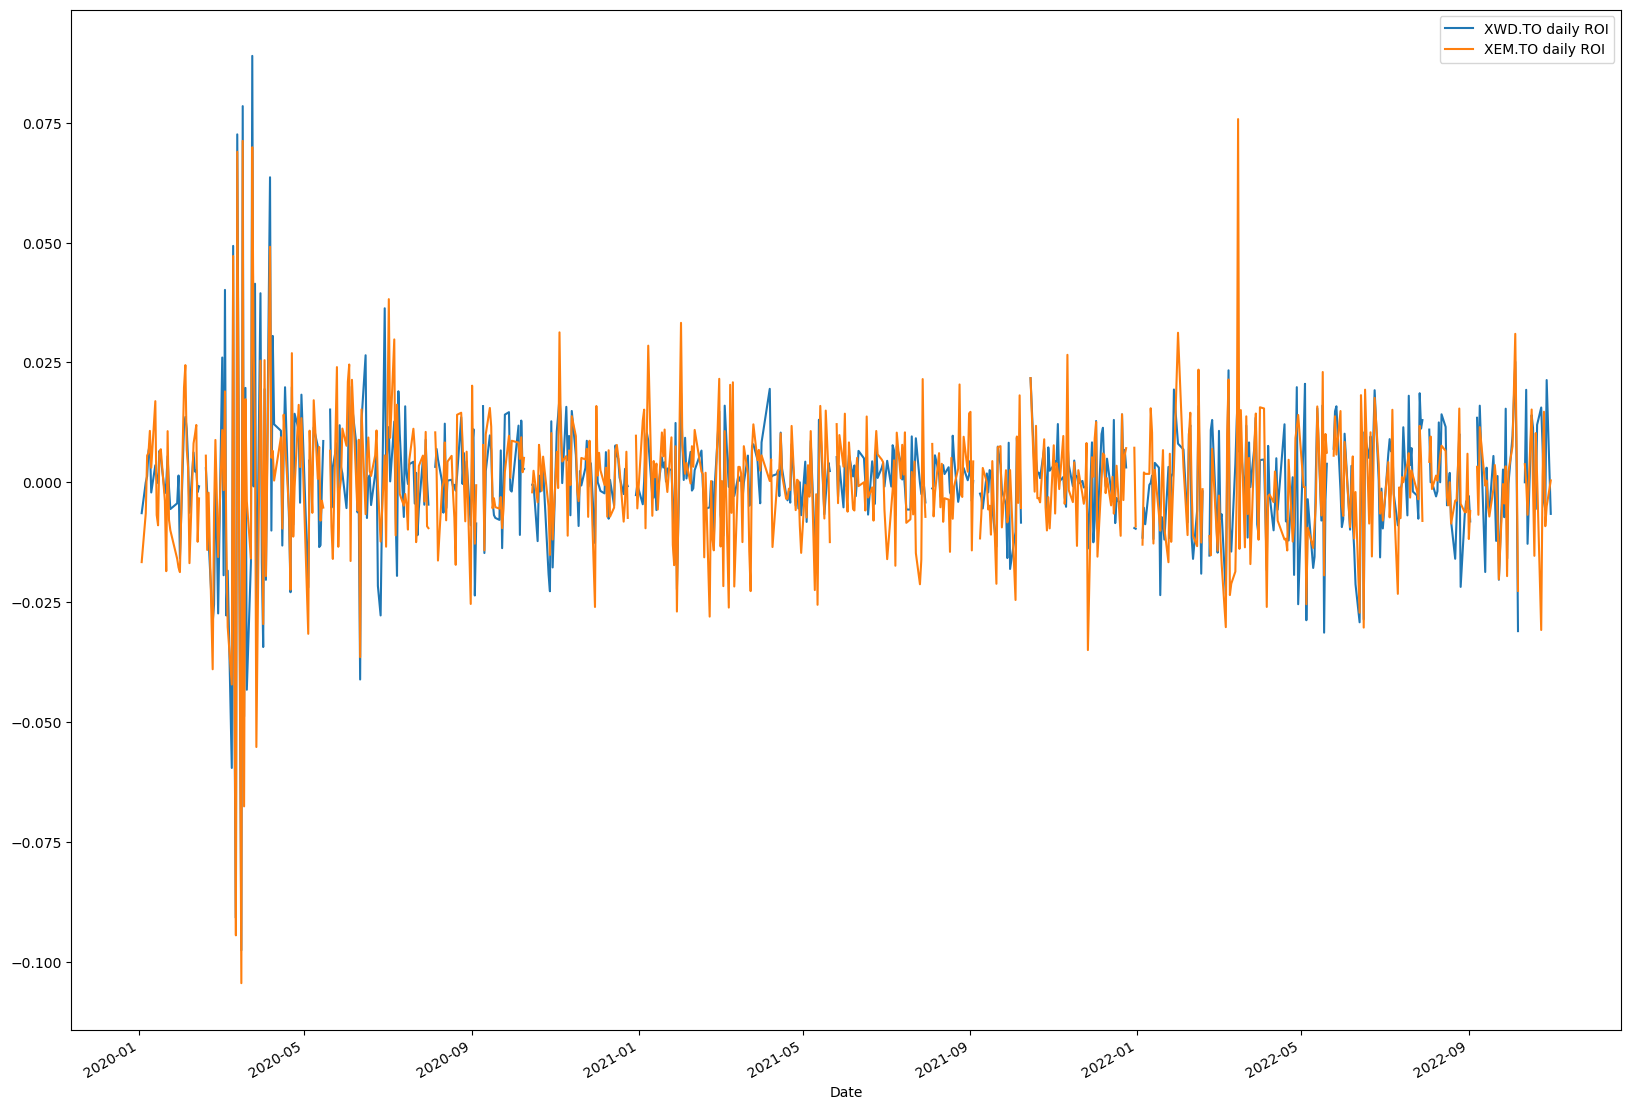

In [20]:
df_indices_daily_roi_MSCI.plot(figsize=(20,15))
plt.show()

Calculate the annual ROI

In [21]:
df_indices_daily_roi_MSCI.mean()*250

XWD.TO daily ROI    0.070763
XEM.TO daily ROI   -0.053153
dtype: float64

The divergence is pretty obvious. The developed market has a positive annual ROI of 7%, while the emerging market has a negative 5%.

Calculate the standard deviation

In [22]:
df_indices_daily_roi_MSCI.std()

XWD.TO daily ROI    0.013774
XEM.TO daily ROI    0.014566
dtype: float64

# 2. S&P500 sector performance analysis

The Covid-19 pandemic has different impacts on different industries. Here, I would want to find out which industries go above the market and vice versa.

Analyze the performance for the following sectors: IT, Financials, energy, industrials, Consumer Staples, Consumer Discretionary, healthcare

In [15]:
df_sp500_indices = pd.DataFrame()

# respective tickers for: IT, Financials, Energy, industrials, Consumer Staples, Consumer Discretionary, Healthcare
indices_tickers = ["^SP500-45","^SP500-40","^GSPE","^SP500-20","^SP500-30","^SP500-25","^SP500-35","^GSPC"]
indices_sector_names = ["IT","Financials","Energy","Industrials","Consumer Staples", "Consumer Discretionary","Healthcare","Market"]

startDate = "2020-01-01"
endDate = "2022-11-01"

# Grab the adjusted close price
for i in range(0, len(indices_tickers)):
    df_sp500_indices[indices_tickers[i] + "-" + indices_sector_names[i]] = yf.download(indices_tickers[i], start=startDate, end=endDate)['Adj Close']    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
df_sp500_indices

,^SP500-45-IT,^SP500-40-Financials,^GSPE-Energy,^SP500-20-Industrials,^SP500-30-Consumer Staples,^SP500-25-Consumer Discretionary,^SP500-35-Healthcare,^GSPC-Market
Date,,,,,,,,
2020-01-02,1639.119995,516.210022,460.339996,700.049988,641.669983,999.010010,1190.449951,3257.850098
2020-01-03,1621.680054,510.519989,458.769989,699.229980,640.549988,990.500000,1180.329956,3234.850098
2020-01-06,1626.380005,510.230011,462.339996,699.039978,642.070007,994.119995,1187.270020,3246.280029
2020-01-07,1624.589966,506.820007,461.390015,698.179993,637.390015,992.869995,1184.410034,3237.179932
2020-01-08,1641.380005,509.559998,453.359985,699.780029,640.260010,994.369995,1192.030029,3253.050049
...,...,...,...,...,...,...,...,...
2022-10-25,2251.110107,548.530029,670.219971,770.330017,740.340027,1156.260010,1514.030029,3859.110107
2022-10-26,2200.830078,550.140015,679.340027,772.979980,745.150024,1144.030029,1530.989990,3830.600098
2022-10-27,2173.330078,554.250000,681.190002,781.820007,745.429993,1135.780029,1522.180054,3807.300049


Obatin some descriptive statistics about the indices dataframe and verify the row counts are roughly the same.

In [17]:
df_sp500_indices.describe()

,^SP500-45-IT,^SP500-40-Financials,^GSPE-Energy,^SP500-20-Industrials,^SP500-30-Consumer Staples,^SP500-25-Consumer Discretionary,^SP500-35-Healthcare,^GSPC-Market
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2300.405839,533.338026,408.336723,758.014341,706.040224,1267.824120,1385.067913,3858.978503
std,416.442853,98.363353,127.553657,113.702801,65.022566,201.785299,162.086162,566.568854
min,1239.390015,293.549988,179.940002,412.059998,500.950012,707.130005,870.989990,2237.399902
25%,2034.697479,449.360008,295.332504,685.807495,660.237488,1128.239990,1238.350037,3382.377502
50%,2328.960083,549.459991,391.735001,773.259979,715.820007,1285.750000,1431.474976,3913.535034
75%,2641.787537,621.649979,520.592499,857.119980,755.062500,1424.430054,1525.184998,4351.917358
max,3107.459961,688.849976,698.429993,905.630005,841.989990,1673.270020,1664.579956,4796.560059


Plot the normalized data. The formula to obtain normalized data is as followed:


$$
    Normalized\, index = \frac{P_{t}}{P_{0}}\ * 100
$$

The SP500 index is highlighted as grey color and bolded. 

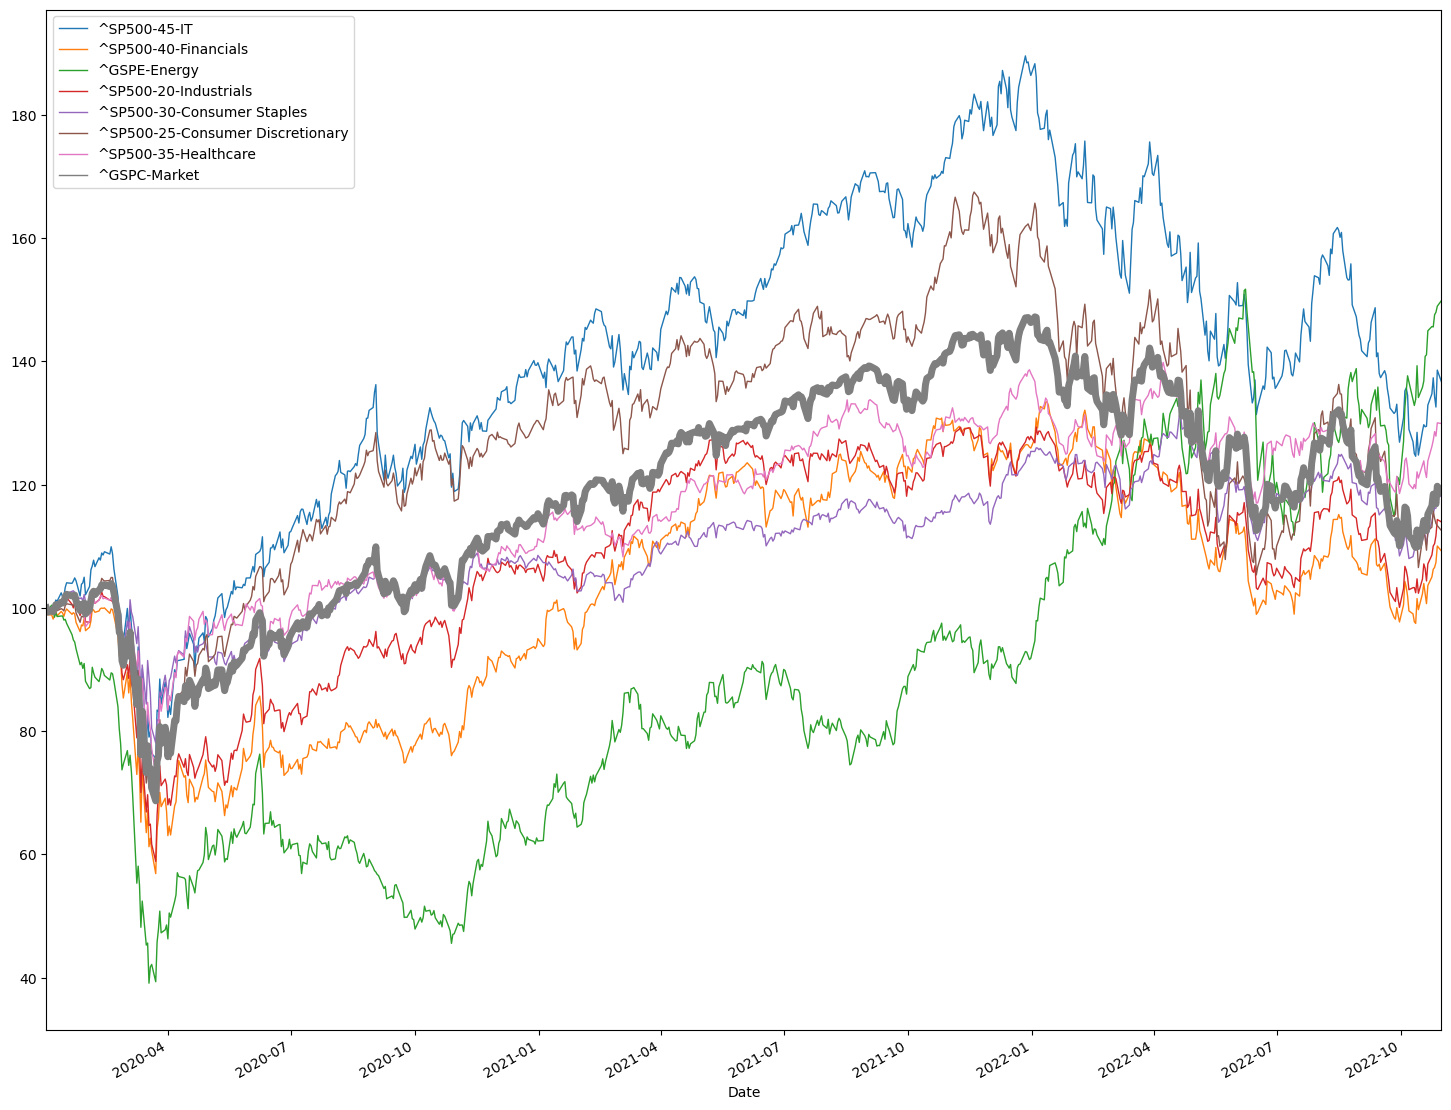

In [19]:
fig, ax = plt.subplots()
((df_sp500_indices/df_sp500_indices.iloc[0])*100).plot(figsize=(18,15),lw=1,ax=ax)

# highlight the S&P500 market line
for line in ax.get_lines():
    if line.get_label() == '^GSPC-Market':
        line.set_linewidth(5)
        
ax.margins(x=0)
plt.show()

Some observations:
- Since Covid-19, IT and Consumer Discretionary have performed stronger than the market.
- The enery sector(^GSPE) was hit the hardest because of the decline in demand of transportation. Since 2022-01, the enery sector skyrocketed because of the Russian-Ukrain conflict.

Perform a correlation analysis

In [27]:
df_sp500_indices.corr()

,^SP500-45-IT,^SP500-40-Financials,^GSPE-Energy,^SP500-20-Industrials,^SP500-25-Consumer,^SP500-35-Healthcare,^GSPC-Market
^SP500-45-IT,1.000000,0.899024,0.462132,0.924409,0.951003,0.926396,0.984649
^SP500-40-Financials,0.899024,1.000000,0.614347,0.964111,0.828395,0.897416,0.955870
^GSPE-Energy,0.462132,0.614347,1.000000,0.532239,0.239398,0.703193,0.536330
^SP500-20-Industrials,0.924409,0.964111,0.532239,1.000000,0.890592,0.894130,0.969609
^SP500-25-Consumer,0.951003,0.828395,0.239398,0.890592,1.000000,0.800793,0.930430
^SP500-35-Healthcare,0.926396,0.897416,0.703193,0.894130,0.800793,1.000000,0.945810
^GSPC-Market,0.984649,0.955870,0.536330,0.969609,0.930430,0.945810,1.000000


To obtain the annual ROI (rate of investment) for these S&P500 IT index, make a get request and it will return a JSON object containing all the key info

In [28]:
from pprint import pprint

# create a dump function to examine all the properties within the object
def dump(obj):
  for attr in dir(obj):
    print("obj.%s = %r" % (attr, getattr(obj, attr)))

SP500_IT = yf.Ticker("^SP500-45")

Examine the JSON data that is returned from Yahoo finance. Here, we specially look at the info property, which contains all the key data

In [29]:
SP500_IT.info

{'exchange': 'SNP',
 'shortName': 'S&P 500 Information Technology ',
 'longName': 'S&P 500 Information Technology (Sector)',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-18000000',
 'quoteType': 'INDEX',
 'symbol': '^SP500-45',
 'messageBoardId': 'finmb_INDEXSP500-45',
 'market': 'us_market',
 'previousClose': 2327.4,
 'regularMarketOpen': 2327.4,
 'twoHundredDayAverage': 2625.775,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 2334.86,
 'navPrice': None,
 'averageDailyVolume10Day': 558440840,
 'totalAssets': None,
 'regularMarketPreviousClose': 2327.4,
 'fiftyDayAverage': 2868.988,
 'trailingAnnualDividendRate': None,
 'open': 2327.4,
 'toCurrency': None,
 'averageVolume10days': 558440840,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 '

Extract some of the key technical data, and store these data into a pd dataframe:
<ul>
    <li>twoHundredDayAverage</li>
    <li>fiftyDayAverage</li>
    <li>fiftyTwoWeekHigh</li>
    <li>fiftyTwoWeekLow</li>
</ul>

In [30]:
df_sp500_IT = pd.DataFrame.from_dict(
    {'250 days average':[SP500_IT.info['twoHundredDayAverage']],
     '52 days average':[SP500_IT.info['fiftyDayAverage']],
     '52 weeks high':[SP500_IT.info['fiftyTwoWeekHigh']],
     '52 weeks low':[SP500_IT.info['fiftyTwoWeekLow']]
    }
)

df_sp500_IT

,250 days average,52 days average,52 weeks high,52 weeks low
0,2625.775,2868.988,3079.53,2188.2


Calculate the maximum annual ROI (return on investment for last 52 weeks).<br> 
To find the maximum annual ROI, take the logrithmic return of (max/min)

In [31]:
sp500_IT_max_return = np.log(df_sp500_IT['52 weeks high']/df_sp500_IT['52 weeks low'])
sp500_IT_max_return

0    0.341698
dtype: float64